# Rede neural CNN - Fine tuning

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [ ]:
path_to_zip

'C:\\Users\\RafaelHenriqueGallo\\.keras\\datasets\\cats_and_dogs.zip'

In [ ]:
PATH

'C:\\Users\\RafaelHenriqueGallo\\.keras\\datasets\\cats_and_dogs_filtered'

# Descompactando a base de dados de gatos e cachorros

In [ ]:
dataset_path = "C:\\Users\\RafaelHenriqueGallo\\.keras\\datasets\\cats_and_dogs.zip"

In [ ]:
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")

In [ ]:
zip_object.extractall("./")

In [ ]:
zip_object.close()

In [ ]:
dataset_path_new = "./cats_and_dogs_filtered"
dataset_path_new

'./cats_and_dogs_filtered'

In [ ]:
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "validation")

**Modelo pré-treinado**

In [ ]:
img_shape = (128, 128, 3)
img_shape

(128, 128, 3)

# Rede Neural - CNN 

In [ ]:
#Modelo de base

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

**Congelando o modelo base**

In [ ]:
base_model.trainable = False

**Definindo o modelo**

In [ ]:
base_model.output

<tf.Tensor 'out_relu/Identity:0' shape=(None, 4, 4, 1280) dtype=float32>

**Compilando o modelo**

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [ ]:
global_average_layer

<tf.Tensor 'global_average_pooling2d/Identity:0' shape=(None, 1280) dtype=float32>

In [ ]:
prediction_layer = tf.keras.layers.Dense(units = 1, activation = "sigmoid")(global_average_layer)

**Definindo o modelo**

In [ ]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = prediction_layer)

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

**Compilando o modelo**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = 0.0001),
             loss="binary_crossentropy", metrics = ["accuracy"])

# Criando geradores de dados (Data Generators)

Redimensionando as imagens 

**Grandes arquiteturas trainadas suportam somente alguns tamanhos pré-definidos**

**Treinando o modelo**

In [ ]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size = (128, 128), batch_size=128, class_mode="binary")
valid_generator = data_gen_train.flow_from_directory(validation_dir, target_size = (128, 128), batch_size=128, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Treinando o modelo**

In [ ]:
model.fit_generator(train_generator, epochs = 25 ,validation_data = valid_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 8 steps
Epoch 1/25
16/16 [==============================] - 60s 4s/step - loss: 3.0387e-08 - accuracy: 1.0000 - val_loss: 0.2745 - val_accuracy: 0.9680
Epoch 2/25
16/16 [==============================] - 7s 445ms/step - loss: 2.7923e-08 - accuracy: 1.0000 - val_loss: 0.2746 - val_accuracy: 0.9680
Epoch 3/25
16/16 [==============================] - 7s 443ms/step - loss: 2.5987e-08 - accuracy: 1.0000 - val_loss: 0.2743 - val_accuracy: 0.9680
Epoch 4/25
16/16 [==============================] - 7s 446ms/step - loss: 2.4293e-08 - accuracy: 1.0000 - val_loss: 0.2739 - val_accuracy: 0.9680
Epoch 5/25
16/16 [==============================] - 7s 441ms/step - loss: 2.2912e-08 - accuracy: 1.0000 - val_loss: 0.2740 - val_accuracy: 0.9680
Epoch 6/25
16/16 [==============================] - 7s 442ms/step - loss: 2.1675e-08 - accuracy: 1.0000 - val_loss: 0.2740 - val_accuracy: 0.9680
Epoch 7/25
16/16 [=================

In [ ]:
#Classificação da rede neural ser um gato ou cachorro.

valid_loss, val_accuracy = model.evaluate_generator(valid_generator)

  ...
    to  
  ['...']


In [ ]:
val_accuracy

0.967

In [ ]:
df = pd.DataFrame(model.history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,3.058359e-08,1.0,0.274545,0.968
1,2.812367e-08,1.0,0.274641,0.968
2,2.616640e-08,1.0,0.274272,0.968
3,2.447183e-08,1.0,0.273914,0.968
4,2.308900e-08,1.0,0.273961,0.968
5,2.184260e-08,1.0,0.274005,0.968
6,2.079037e-08,1.0,0.273541,0.968
7,1.992180e-08,1.0,0.273278,0.966
8,1.911153e-08,1.0,0.272937,0.967
9,1.841272e-08,1.0,0.272834,0.967


In [ ]:
plt[["loss", "val_accuracy"]].plot()
plt.show()

TypeError: 'module' object is not subscriptable

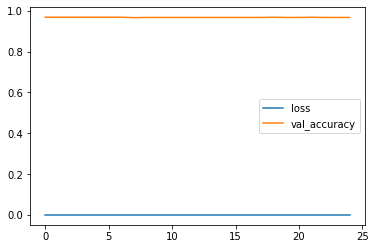

In [ ]:
df[["loss", "val_accuracy"]].plot()
plt.show()

# Fine tuning

In [ ]:
base_model.trainable = True
len(base_model.layers)

155

In [ ]:
fine_tuning_at = 100

In [ ]:
for layer in base_model.layers[:fine_tuning_at]:
    layer.trainable = False

**Compilando o modelo para fine tuning**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = 0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit_generator(train_generator, epochs=25, validation_data = valid_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 8 steps
Epoch 1/25
16/16 [==============================] - 13s 800ms/step - loss: 1.3232e-08 - accuracy: 1.0000 - val_loss: 0.2601 - val_accuracy: 0.9670
Epoch 2/25
16/16 [==============================] - 7s 451ms/step - loss: 1.3127e-08 - accuracy: 1.0000 - val_loss: 0.2590 - val_accuracy: 0.9670
Epoch 3/25
16/16 [==============================] - 7s 453ms/step - loss: 1.2999e-08 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.9680
Epoch 4/25
16/16 [==============================] - 7s 443ms/step - loss: 1.2886e-08 - accuracy: 1.0000 - val_loss: 0.2572 - val_accuracy: 0.9680
Epoch 5/25
16/16 [==============================] - 7s 447ms/step - loss: 1.2784e-08 - accuracy: 1.0000 - val_loss: 0.2564 - val_accuracy: 0.9680
Epoch 6/25
16/16 [==============================] - 7s 463ms/step - loss: 1.2630e-08 - accuracy: 1.0000 - val_loss: 0.2551 - val_accuracy: 0.9680
Epoch 7/25
16/16 [==============

In [ ]:
tf[["loss", "val_accuracy"]].plot()
plt.show()

**Avaliação do modelo com fine tuning**

In [ ]:
valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)

  ...
    to  
  ['...']


In [ ]:
valid_accuracy

0.967